**Data Yükleme**

In [3]:

import pandas as pd 
df= pd.read_csv ("C:\\Users\\nilay\\Documents\\GitHub\\Turkcell_ML_Projects-\\Advertising.csv")
df=df.drop("Unnamed: 0",axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Veri İnceleme**

In [ ]:
df.info() 
"""
200 adet gözlem bulunmaktadır. 
Her bir gözlemde 4 adet float tipinde değişken bulunmaktadır.
Veri setinde eksik gözlem bulunmamaktadır.
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


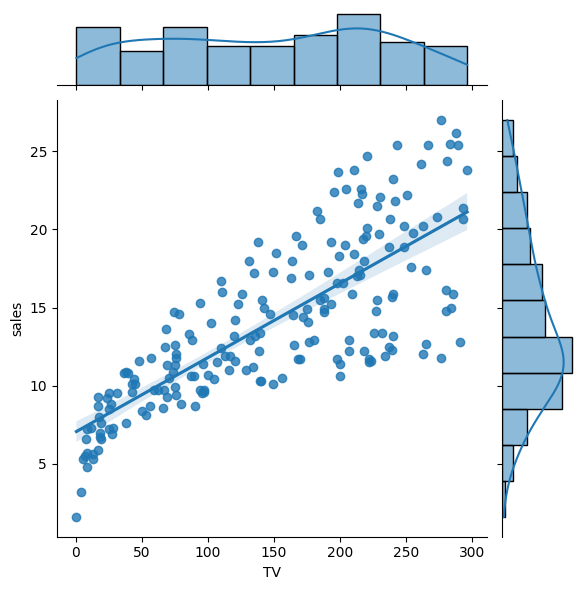

In [ ]:
import seaborn as sns  
sns.jointplot(x="TV",y="sales",data=df,kind="reg")# regresyon çizgisi eklendi
""" Pozitif İLişki : TV satışları arttıkça satışların da arttığı görülmektedir."""
 

In [4]:
X=df[["TV"]]
y=df[["sales"]]


**Model Eğitimi**

In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
reg=model.fit(X,y)

In [ ]:
dir(reg) # model ile kullanılabilecek fonksiyonlar listesi 

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',

In [6]:
reg.intercept_ # sabit katsayı (b1 katsayısı)

array([7.03259355])

In [7]:
reg.coef_  #eğim(b0 katsayısı)

array([[0.04753664]])

In [ ]:
reg.score(X,y) # R^2 değeri: satışlardaki değişkenin TV değişkeni ile açıklanma oranı %61'dir 

0.611875050850071

**Tahmin**

"\nci=None  :  güven aralığını çizmemek için kullanılır.\nscatter_kws={'color':'r', 's':9} noktaların kırmızı renkte (r) ve boyutunun 9 olmasını sağlar.\nX ekseni sınırlarını -10 ile 310 arasında ayarlar.\nY ekseni için minimum değeri 0 olarak belirler.\n"

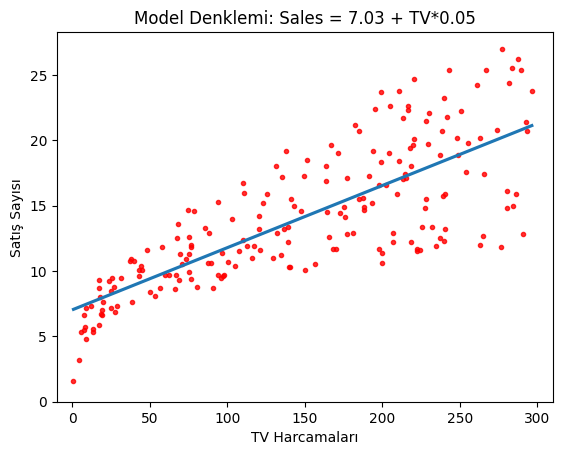

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.regplot(x=df["TV"], y=df["sales"], ci  =None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı") 
g.set_xlabel("TV Harcamaları")

plt.xlim(-10, 310)
plt.ylim(bottom=0)

"""
ci=None  :  güven aralığını çizmemek için kullanılır.
scatter_kws={'color':'r', 's':9} noktaların kırmızı renkte (r) ve boyutunun 9 olmasını sağlar.
X ekseni sınırlarını -10 ile 310 arasında ayarlar.
Y ekseni için minimum değeri 0 olarak belirler.
"""

In [ ]:
reg.predict([[165]]) # tek bir gözlem için tahmin yapma

c:\Users\nilay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [9]:
yeni_veri=[[5],[15],[56.7]] # TV=5,TV=15,TV=56.7 iken satış tahminleri
model.predict(yeni_veri)

c:\Users\nilay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [9.72792106]])

In [10]:
tahmin=model.predict(X)
df["Tahmin"]=tahmin  
df["Hata"]=df["sales"]-df["Tahmin"]
df.head()


,TV,radio,newspaper,sales,Tahmin,Hata
0,230.1,37.8,69.2,22.1,17.970775,4.129225
1,44.5,39.3,45.1,10.4,9.147974,1.252026
2,17.2,45.9,69.3,9.3,7.850224,1.449776
3,151.5,41.3,58.5,18.5,14.234395,4.265605
4,180.8,10.8,58.4,12.9,15.627218,-2.727218


In [11]:
import numpy as np

# MSE (Mean Squared Error - Hata Kareler Ortalaması)
df["Hata Kareler"] = df["Hata"] ** 2
mse = df["Hata Kareler"].mean()  # Ortalama alındı

# RMSE (Root Mean Squared Error - Hata Kareler Ortalaması Karekökü)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MSE: 10.512652915656757
RMSE: 3.2423221486546887
